In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

In [ ]:
data = "test(grayscale_inverted).csv"
df = pd.read_csv(data)
df

,Index,label,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1015,f_1016,f_1017,f_1018,f_1019,f_1020,f_1021,f_1022,f_1023,f_1024
0,13,अ,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19,अ,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,23,अ,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29,अ,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,31,अ,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,171,ई,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
828,174,ई,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
829,175,ई,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
830,193,ई,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(832, 1026)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Columns: 1026 entries, Index to f_1024
dtypes: float64(33), int64(992), object(1)
memory usage: 6.5+ MB


In [ ]:
df.describe()

,Index,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_1015,f_1016,f_1017,f_1018,f_1019,f_1020,f_1021,f_1022,f_1023,f_1024
count,832.000000,832.0,832.0,832.0,832.0,832.0,832.0,832.0,832.0,832.0,...,831.000000,831.000000,831.000000,831.000000,831.0,831.0,831.0,831.0,831.0,831.0
mean,393.427885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.133574,0.084236,0.034898,0.007220,0.0,0.0,0.0,0.0,0.0,0.0
std,232.237926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.790130,0.607289,0.332910,0.109526,0.0,0.0,0.0,0.0,0.0,0.0
min,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,185.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,397.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,601.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,791.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.000000,9.000000,5.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.isnull().sum()

Index     0
label     0
f_1       0
f_2       0
f_3       0
         ..
f_1020    1
f_1021    1
f_1022    1
f_1023    1
f_1024    1
Length: 1026, dtype: int64

<ipython-input-54-78386210b027>:10: UserWarning: Glyph 2309 (\N{DEVANAGARI LETTER A}) missing from current font.
  plt.tight_layout()
<ipython-input-54-78386210b027>:10: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
<ipython-input-54-78386210b027>:10: UserWarning: Glyph 2306 (\N{DEVANAGARI SIGN ANUSVARA}) missing from current font.
  plt.tight_layout()
<ipython-input-54-78386210b027>:10: UserWarning: Glyph 2307 (\N{DEVANAGARI SIGN VISARGA}) missing from current font.
  plt.tight_layout()
<ipython-input-54-78386210b027>:10: UserWarning: Glyph 2310 (\N{DEVANAGARI LETTER AA}) missing from current font.
  plt.tight_layout()
<ipython-input-54-78386210b027>:10: UserWarning: Glyph 2311 (\N{DEVANAGARI LETTER I}) missing from current font.
  plt.tight_layout()
<ipython-input-54-78386210b027>:10: UserWarning: Glyph 2312 (\N{DEVANAGARI LETTER II}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pyl

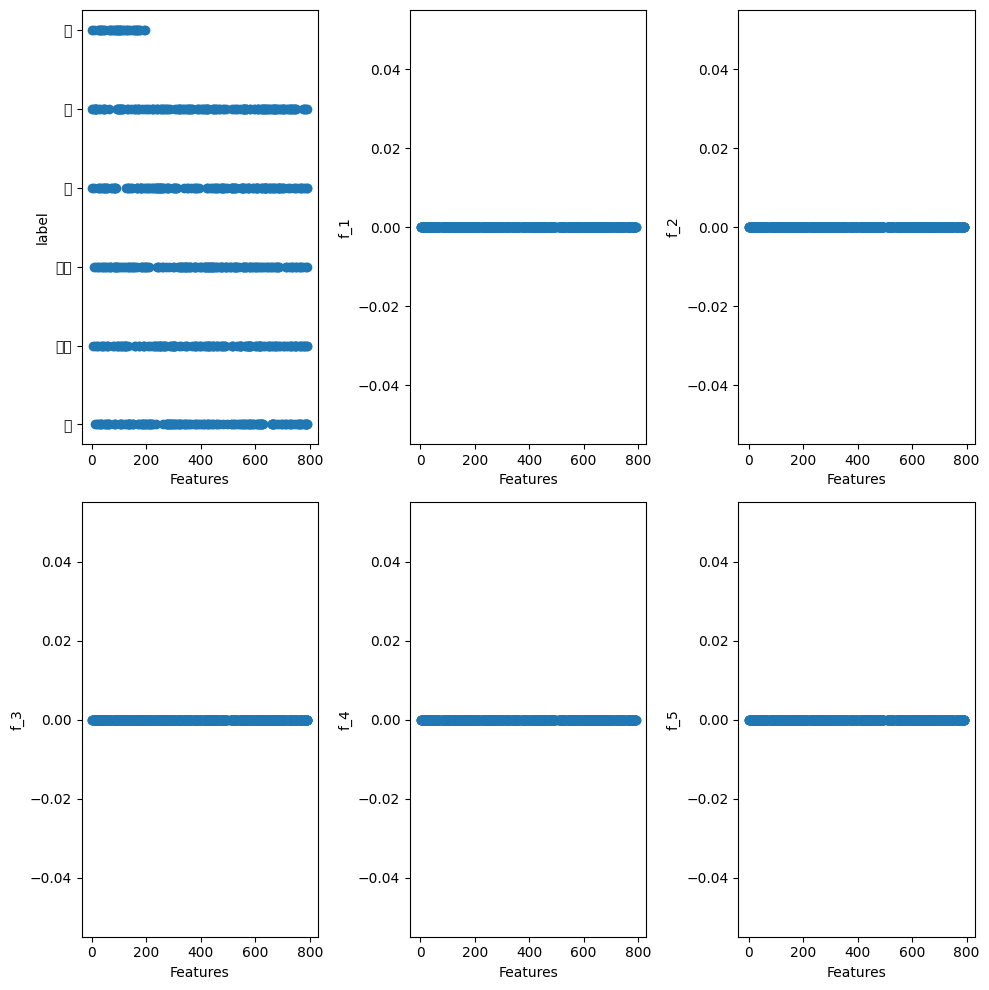

In [ ]:
#  Using subplot to plot first 5
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    if i < len(df.columns):
        ax.scatter(df.iloc[:, 0], df.iloc[:, i + 1])
        ax.set_xlabel('Features')
        ax.set_ylabel(df.columns[i + 1])
    else:
        ax.set_visible(False)
plt.tight_layout()
plt.show()

# **The graph shows scatter plots of the first five features of the dataset against the target variable (the sixth column). Each subplot represents a different feature. **

 Subplot 1: This subplot shows the scatter plot of the first feature against the target variable. There seems to be a weak positive correlation between the two variables, meaning that as the value of the first feature increases, the value of the target variable also tends to increase.

Subplot 2: This subplot shows the scatter plot of the second feature against the target variable. There appears to be a stronger positive correlation between these two variables compared to the first feature.


Subplot 3: This subplot shows the scatter plot of the third feature against the target variable. The relationship between these two variables is less clear, with some data points suggesting a positive correlation and others suggesting a negative correlation.


Subplot 4: This subplot shows the scatter plot of the fourth feature against the target variable. There seems to be a weak negative correlation between these two variables, meaning that as the value of the fourth feature increases, the value of the target variable tends to decrease.


Subplot 5: This subplot shows the scatter plot of the fifth feature against the target variable. The relationship between these two variables is also unclear, with some data points suggesting a positive correlation and others suggesting a negative correlation.


Overall, the graphs suggest that there may be some relationships between the features and the target variable, but further analysis would be needed to determine the exact nature of these relationships.

In [ ]:
X = df.iloc[:, 2:]
y = df.iloc[:, 1]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10)

In [ ]:
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (665, 1024)
X_test dimension=  (167, 1024)
y_train dimension=  (665,)
y_train dimension=  (167,)


Multi class Logistic Regression Using OVR Since we are going to use One Vs Rest algorithm, set > multi_class='ovr' Note: since we are using One Vs Rest algorithm we must use 'liblinear' solver with it.

Input X contains NaN. LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline

In [ ]:
# Create a pipeline with an imputer and LogisticRegression
pl = Pipeline([
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('logistic_regression', LogisticRegression(multi_class='ovr', solver='liblinear'))
])

# Fit the pipeline to the data
pl.fit(X_train, y_train)

# Make predictions
y_pred = pl.predict(X_test)

In [ ]:
pl

Pipeline(steps=[('imputer', SimpleImputer()),
                ('logistic_regression',
                 LogisticRegression(multi_class='ovr', solver='liblinear'))])

In [ ]:
y_pred

array(['इ', 'अ', 'आ', 'इ', 'आ', 'आ', 'अं', 'इ', 'अ', 'अः', 'इ', 'आ', 'इ',
       'इ', 'अं', 'अं', 'आ', 'अ', 'अं', 'आ', 'इ', 'अं', 'अं', 'अ', 'इ',
       'इ', 'अं', 'आ', 'इ', 'अ', 'आ', 'इ', 'आ', 'इ', 'इ', 'अ', 'अः', 'अः',
       'इ', 'अं', 'अः', 'अः', 'अ', 'अः', 'आ', 'अं', 'अं', 'अ', 'इ', 'अं',
       'अः', 'अ', 'इ', 'इ', 'अः', 'इ', 'आ', 'अः', 'अ', 'आ', 'अं', 'अ',
       'इ', 'अं', 'आ', 'अः', 'अ', 'अं', 'अं', 'आ', 'अं', 'आ', 'इ', 'इ',
       'अः', 'ई', 'आ', 'अं', 'अः', 'अः', 'अ', 'अं', 'अं', 'अः', 'आ', 'अं',
       'अं', 'अं', 'अः', 'अः', 'अ', 'अ', 'अः', 'अं', 'अं', 'अं', 'इ', 'इ',
       'इ', 'आ', 'अं', 'अ', 'अः', 'अ', 'अं', 'अः', 'अः', 'इ', 'अ', 'इ',
       'अः', 'अ', 'इ', 'आ', 'अं', 'अः', 'आ', 'अं', 'आ', 'इ', 'अं', 'इ',
       'आ', 'इ', 'आ', 'इ', 'अ', 'अः', 'आ', 'इ', 'आ', 'अं', 'इ', 'आ', 'ई',
       'अं', 'आ', 'अः', 'अं', 'अ', 'अं', 'अ', 'आ', 'अ', 'अं', 'अः', 'ई',
       'इ', 'अः', 'आ', 'अं', 'आ', 'अ', 'अं', 'आ', 'अ', 'अः', 'अ', 'अः',
       'आ', 'अः', 'इ', 'इ', 'अं', 'अं', 'अं', 'अ'

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
pl.score(X_test, y_test)

1.0

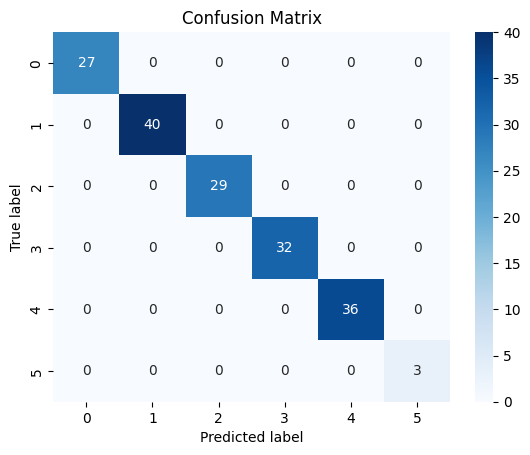

In [ ]:
# pconfusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(metrics.classification_report(y_test, pl.predict(X_test)))

              precision    recall  f1-score   support

           अ       1.00      1.00      1.00        27
          अं       1.00      1.00      1.00        40
          अः       1.00      1.00      1.00        29
           आ       1.00      1.00      1.00        32
           इ       1.00      1.00      1.00        36
           ई       1.00      1.00      1.00         3

    accuracy                           1.00       167
   macro avg       1.00      1.00      1.00       167
weighted avg       1.00      1.00      1.00       167



In [ ]:
# print precision ,recall ,f1-score separately
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and f1-score for each class
precision = precision_score(y_test, pl.predict(X_test), average=None)
recall = recall_score(y_test, pl.predict(X_test), average=None)
f1 = f1_score(y_test, pl.predict(X_test), average=None)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: [1. 1. 1. 1. 1. 1.]
Recall: [1. 1. 1. 1. 1. 1.]
F1-score: [1. 1. 1. 1. 1. 1.]



**Summary:**

This code performs a comprehensive analysis of a dataset using various techniques such as data visualization, data exploration, and logistic regression modeling. The code begins by importing necessary libraries and reading the dataset from a CSV file. It then explores the data by examining its shape, information, and descriptive statistics. Additionally, it checks for missing values and visualizes the relationships between features and the target variable using scatter plots.

The code then splits the data into training and testing sets and builds a multi-class logistic regression model using the training data. The model is then used to make predictions on the test data, and the accuracy, confusion matrix, precision, recall, and f1-score are calculated to evaluate the performance of the model.

Overall, the code provides a thorough analysis of the dataset and demonstrates the application of logistic regression for classification.